In [1]:
import seaborn as sns
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import cv2
import matplotlib.pyplot as plt


from skimage.transform import resize

In [5]:
link = 'Data\Cuerpos_agua\Water Bodies Dataset\Images'

img_resize = 150
img_predict = []
img_label = []
img_gray=[]
img_real = []
img_HSV=[]
list_path = []

In [6]:
def read_image(label,root):
    cont = 0
    for img in tqdm(os.listdir(root)):
        path = root + '/' + img
        list_path.append(path)
        #return a root and extention 
        rootFile = os.path.splitext(path)
        if rootFile[1] == ".jpg":
            image = cv2.imread(path,cv2.IMREAD_COLOR)
            image = cv2.resize(image, (img_resize,img_resize), interpolation=cv2.INTER_LINEAR)
            img_real_color = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            img_gray2 = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
            img_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

            img_label.append(str(label)+ "_" + str(cont))
            img_predict.append(np.array(image))
            img_real.append(np.array(img_real_color))
            img_gray.append(np.array(img_gray2))
            img_HSV.append(np.array(img_hsv))
            cont +=1

In [7]:
read_image('water_body',link)

100%|██████████████████████████████████████████████████████████████████████████████| 2838/2838 [00:45<00:00, 62.51it/s]


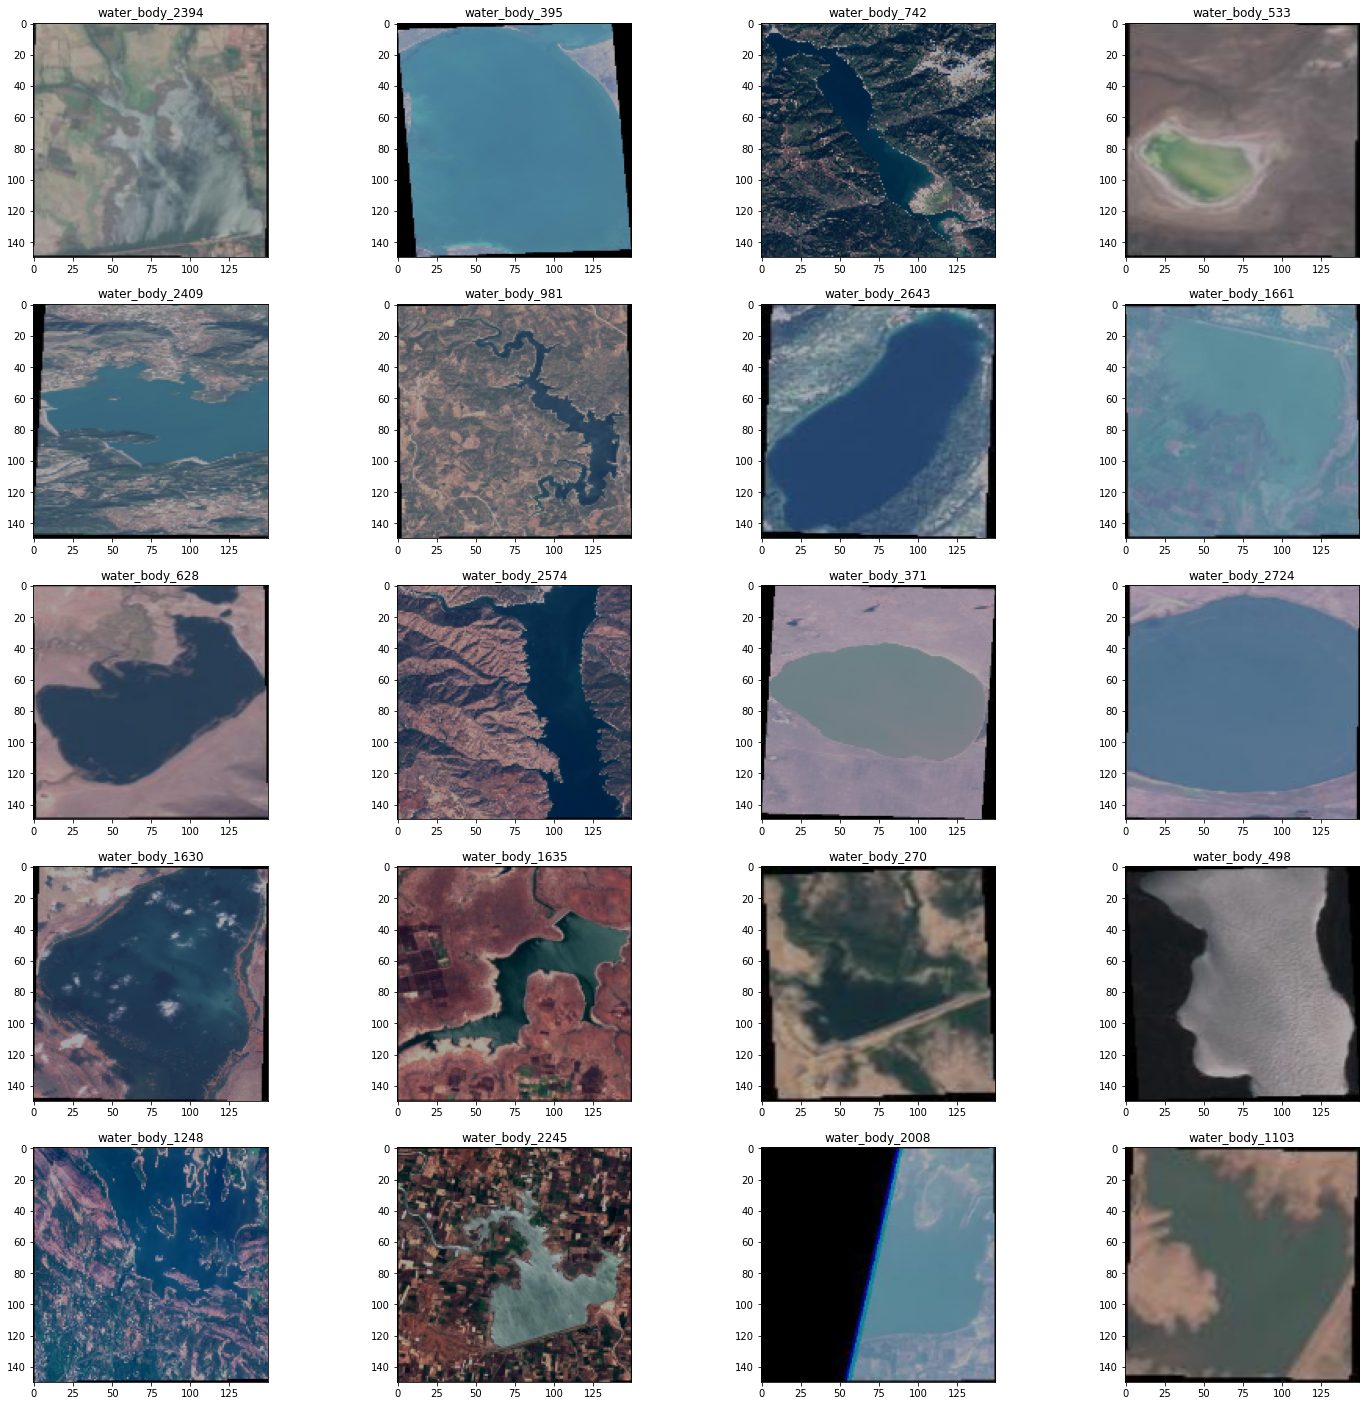

In [8]:
fig,ax = plt.subplots(5,4)
fig.set_size_inches(25,25)
for i in range(5):
    for j in range(4):
        l = random.randint(0,len(img_label))
        ax[i,j].imshow(img_real[l])
        ax[i,j].set_title(img_label[l])

In [10]:
from skimage.feature import hog
from skimage import exposure

C:\Users\crist\AppData\Local\Temp\ipykernel_17904\3123924084.py:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd_flowers,hog_image_flowers = hog(img_HSV[2643],orientations=9,pixels_per_cell=(4,4),cells_per_block=(2,2),visualize=True,multichannel=True,


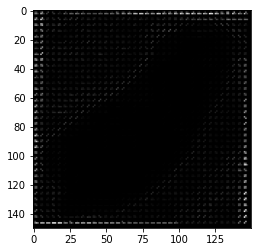

In [11]:
fd_flowers,hog_image_flowers = hog(img_HSV[2643],orientations=9,pixels_per_cell=(4,4),cells_per_block=(2,2),visualize=True,multichannel=True,
                                   block_norm='L2')
plt.imshow(hog_image_flowers, cmap="gray")

In [13]:
img_HSV[2643]/255

array([[[ 45, 255,   2],
        [ 60, 255,   1],
        [ 60, 255,   1],
        ...,
        [ 83,  93,  11],
        [ 83, 204,   5],
        [ 60, 255,   1]],

       [[ 36, 106,  12],
        [ 36, 182,   7],
        [ 45, 204,   5],
        ...,
        [ 90, 255,   3],
        [ 90, 255,   2],
        [ 75, 255,   4]],

       [[ 40, 255,   3],
        [ 38, 255,   4],
        [ 40,  96,   8],
        ...,
        [103, 149,  12],
        [ 98, 120,  17],
        [ 87, 128,  18]],

       ...,

       [[120,  89,  23],
        [120, 136,  15],
        [120, 198,   9],
        ...,
        [ 60, 255,   2],
        [ 45, 255,   2],
        [ 38, 255,   4]],

       [[170,  77,  20],
        [174, 142,   9],
        [  0, 255,   4],
        ...,
        [ 60, 255,   3],
        [ 45, 255,   2],
        [ 40, 255,   3]],

       [[  3, 234,  12],
        [  4, 255,   8],
        [  4, 227,   9],
        ...,
        [ 53, 255,   4],
        [ 60, 255,   1],
        [ 60, 255,   1]]

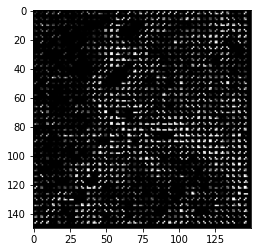

In [172]:
hog_image_rescaled = exposure.rescale_intensity(hog_image_flowers,in_range=(15,50))
plt.imshow(hog_image_rescaled, cmap="gray")

In [17]:
#plt.imshow(img_bgr[2387],cmap="gray")

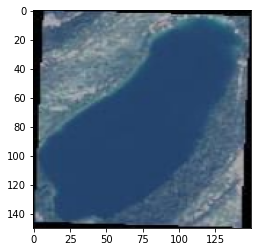

In [15]:
_, outline = cv2.threshold(img_gray[6], thresh=11, maxval=255, type=cv2.THRESH_BINARY) #creating mask from aml2

plt.imshow(img_real[2643]) #output of the mask
outline = outline.astype(np.uint8)

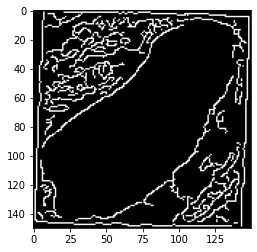

In [16]:
from skimage import feature
edges = feature.canny(img_gray[2643],sigma=1)
plt.imshow(edges,cmap="gray")

C:\Users\crist\AppData\Local\Temp\ipykernel_4240\1909496283.py:3: FutureWarning: `max_iter` is a deprecated argument name for `chan_vese`. It will be removed in version 1.0. Please use `max_num_iter` instead.
  cv = chan_vese(img_gray[2000], mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,


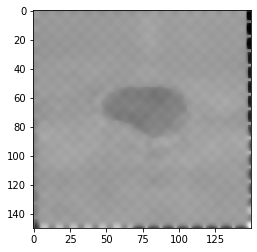

In [177]:
from skimage.segmentation import chan_vese

cv = chan_vese(img_gray[2000], mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set="checkerboard", extended_output=True)

plt.imshow(cv[1],cmap="gray")

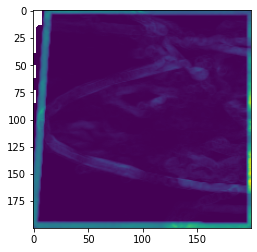

In [165]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern

METHOD = 'var'
radius = 4

n_points = 8 * radius

lbp_flowers = local_binary_pattern(img_gray[100],n_points,radius,METHOD)

plt.imshow(lbp_flowers)

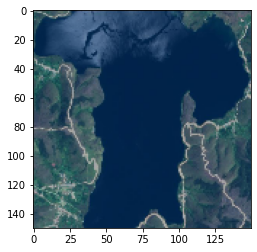

In [211]:
plt.imshow(img_real[2])